# Coursera Capstone Project 

--------------------------------------------

The battle of  Toronto neighborhoods 

1.	Introduction: 

1.1.	Background: Traveling this days can be an expensive hobbit, but there is always a way to hack the expenses for the duration of the trip.  One of the hacks is to stay in an affordable accommodations like Hostels, it might be not for everyone but maybe you are one of those who love to travel and explore new experiences. But, starting a Hostel can be an exciting and profitable venture for an entrepreneur with a passion and love for traveling and customer service. Toronto is one of the most popular and busiest Canada cities. A business man decides it would be a good business move to open a new Hostel in Toronto.

1.2.	Problem: Before opening a hostel, it would be obvious to analyze the possible factors that could aid or harm the business. In the scope of this project my goal is to analyze the best neighborhood in Toronto to open a new Hostel. The possible factors to be considered are: Which is the liveliest neighborhood amongst all neighborhoods?  How many hostels and hotel  are there in each neighborhood? 

1.3.	Interest: The stakeholders involved in opening a new hostel would be interested in the analysis of the neighborhoods  and the hostel competition in each neighborhoods.



----------------------------------------------------

Importing Libraries

In [772]:
import pandas as pd
import numpy as np

-----------------

# Transforming the data in the table on the wikipedia page into a pandas dataframe.

In [773]:

tables= pd.read_html(r"C:\Users\Administrador\Desktop\Machine Learning\Coursera\List of postal codes of Canada_ M - Wikipedia.html")

In [774]:
len(tables)

3

In [775]:
toronto_nb= tables[0]

-----------------------------

# Data cleaning and preparation

In [776]:
toronto_nb.describe(include='O')

,Postcode,Borough,Neighbourhood
count,289,289,289
unique,180,12,210
top,M9V,Not assigned,Not assigned
freq,8,77,78


We are not going to process the cells that have a Not assignet Borough

In [777]:
# let`s tranforn de dataframe excluding the cells that include  a Not assignet Borough
toronto_nb = toronto_nb[toronto_nb.Borough != 'Not assigned']


In [778]:
toronto_nb.describe(include='O')

,Postcode,Borough,Neighbourhood
count,212,212,212
unique,103,11,210
top,M9V,Etobicoke,St. James Town
freq,8,45,2


Now we need to join the rows that contains  the same postal code, usimg groupby(), apply() and .join

In [779]:
toronto_nb = toronto_nb.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(', '.join).reset_index()

In [780]:
toronto_nb.head(10)

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [781]:
toronto_nb.describe(include='O')

,Postcode,Borough,Neighbourhood
count,103,103,103
unique,103,11,103
top,M6E,North York,Not assigned
freq,1,24,1


In [926]:
#Checking the dataframe shape
toronto_nb.shape

(103, 3)

# Our Dataframe is ready to be used 

---------------------------------------------------------------------

Now we are goint to build our second DataFrame

In [783]:
df=pd.read_csv(r"C:\Users\Administrador\Desktop\Machine Learning\Coursera\Geospatial_Coordinates.csv")

In [784]:
df.columns

Index(['Postal Code', 'Latitude', 'Longitude'], dtype='object')

The next step will merge our data sets

In [785]:
# We need to macht the columns name in our data frames
toronto_nb.rename(columns={ 'Postcode':'Postal Code'},inplace=True)

In [786]:
toronto_nb.head()

,Postal Code,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [787]:
df_final=pd.merge(toronto_nb,df,how='left',on='Postal Code')

In this case we want to explore the downtown area of the city, let`s rechape our data frame

In [788]:

df_final = df_final[~df_final['Borough'].isin(['Scarborough', 'Etobicoke', 'Mississauga', 'York', 'North York', 'East York','East Toronto', 'West Toronto', 'Central Toronto'])]
df_final.shape

(19, 5)

In [994]:
df_final

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
50,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529
51,M4X,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675
52,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
53,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
54,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937
55,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
56,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
57,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
58,M5H,Downtown Toronto,"Adelaide, King, Richmond",43.650571,-79.384568
59,M5J,Downtown Toronto,"Harbourfront East, Toronto Islands, Union Station",43.640816,-79.381752


With the final Data Frame we are going to start exploring the neighborhoods of Toronto

-------------------------------------

# Exploring the Neighborhoods of Toronto

In [791]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


Use geopy library to get the latitude and longitude values of Toronto City

In [792]:
address = 'Toronto, TNT'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.7100515, -79.3152833747414.


---------------------------------------------------------------------

## Create a map of Toronto 

In [793]:
# create map of Manhattan using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_final['Latitude'], df_final['Longitude'], df_final['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Define Fourscare Credentials and Version

In [794]:
CLIENT_ID = 'ORBRVH0UV1ED2IX24SN0S0NR1G4AA1ML3ZW3DBYSMRMXBP0S' # your Foursquare ID
CLIENT_SECRET = 'RFZF00CZXUJRZYCP3MQ3G3URJFPUAKMSSWDXKPEYKK50APRK' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ORBRVH0UV1ED2IX24SN0S0NR1G4AA1ML3ZW3DBYSMRMXBP0S
CLIENT_SECRET:RFZF00CZXUJRZYCP3MQ3G3URJFPUAKMSSWDXKPEYKK50APRK


In [795]:
LIMIT=100
radius=500

Explore Neighborhoods in Toronto

In [796]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [797]:

toronto_venues = getNearbyVenues(names=df_final['Neighbourhood'],
                                   latitudes=df_final['Latitude'],
                                   longitudes=df_final['Longitude']
                                  )

Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront, Regent Park
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Not assigned


#### Let's check the size of the resulting dataframe

In [928]:
print(toronto_venues.shape)
toronto_venues.head()

(1324, 7)


,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rosedale,43.679563,-79.377529,Rosedale Park,43.682328,-79.378934,Playground
1,Rosedale,43.679563,-79.377529,Whitney Park,43.682036,-79.373788,Park
2,Rosedale,43.679563,-79.377529,Alex Murray Parkette,43.678300,-79.382773,Park
3,Rosedale,43.679563,-79.377529,Milkman's Lane,43.676352,-79.373842,Trail
4,"Cabbagetown, St. James Town",43.667967,-79.367675,Cranberries,43.667843,-79.369407,Diner


Let's check how many venues were returned for each neighborhood

In [996]:
toronto_venues.groupby('Neighbourhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Berczy Park,57,57,57,57,57,57
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",14,14,14,14,14,14
"Cabbagetown, St. James Town",45,45,45,45,45,45
Central Bay Street,81,81,81,81,81,81
"Chinatown, Grange Park, Kensington Market",100,100,100,100,100,100
Christie,16,16,16,16,16,16
Church and Wellesley,88,88,88,88,88,88
"Commerce Court, Victoria Hotel",100,100,100,100,100,100


Let`s find out how many unique categories can be curated from all the returned venues

In [930]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 211 uniques categories.


Analyze Each Neighborhood

In [931]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 
toronto_onehot['Neighbourhoods'] = toronto_onehot['Neighbourhood']


# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighbourhoods,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Business Service,Butcher,Café,Camera Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Neighbourhood
0,Rosedale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Rosedale
1,Rosedale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Rosedale
2,Rosedale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [932]:
# We are not going to use all the venues categories for our project.
toronto_onehot.columns.values

array(['Neighbourhoods', 'Accessories Store', 'Adult Boutique',
       'Afghan Restaurant', 'Airport', 'Airport Food Court',
       'Airport Gate', 'Airport Lounge', 'Airport Service',
       'Airport Terminal', 'American Restaurant', 'Antique Shop',
       'Aquarium', 'Art Gallery', 'Art Museum', 'Arts & Crafts Store',
       'Asian Restaurant', 'Athletics & Sports', 'BBQ Joint',
       'Baby Store', 'Bagel Shop', 'Bakery', 'Bank', 'Bar',
       'Baseball Stadium', 'Basketball Stadium', 'Beach', 'Beer Bar',
       'Beer Store', 'Belgian Restaurant', 'Bistro', 'Boat or Ferry',
       'Bookstore', 'Boutique', 'Brazilian Restaurant', 'Breakfast Spot',
       'Brewery', 'Bubble Tea Shop', 'Building', 'Burger Joint',
       'Burrito Place', 'Business Service', 'Butcher', 'Café',
       'Camera Store', 'Caribbean Restaurant', 'Cheese Shop',
       'Chinese Restaurant', 'Chocolate Shop', 'Church', 'Clothing Store',
       'Cocktail Bar', 'Coffee Shop', 'College Arts Building',
       'Colleg

## Our venues categories are related with the amenities that our target costumers usually looks for.

In [963]:



toronto_onehot2=toronto_onehot[['Neighbourhoods', 'Airport', 'Airport Food Court',
       'Airport Gate', 'Airport Lounge', 'Airport Service',
       'Airport Terminal',
       'Aquarium', 'Art Gallery', 'Art Museum', 'Bank', 'Bar',
       'Baseball Stadium', 'Basketball Stadium', 'Beach', 'Beer Bar', 'Boat or Ferry','Brewery',  'Café',
       'Concert Hall', 'Convenience Store', 
       'Event Space',  'Farmers Market',
       'Fast Food Restaurant', 
       'Fish Market', 'Food & Drink Shop', 'Food Court', 'Food Truck', 'Gay Bar',
       'General Entertainment', 'General Travel', 'Grocery Store', 'Gym', 'Gym / Fitness Center',
       'Harbor / Marina',
       'Historic Site', 'History Museum', 'Hostel', 'Hotel', 'Hotel Bar', 'Jazz Club', 'Lake','Liquor Store', 'Market', 'Martial Arts Dojo', 'Massage Studio',
       
       'Monument / Landmark',  'Museum', 'Music Venue',
       'Neighborhood', 'New American Restaurant', 'Nightclub','Opera House',  'Other Great Outdoors', 'Park',
       'Performing Arts Venue', 'Pharmacy', 'Pub', 'Restaurant', 
       'Scenic Lookout', 'Sculpture Garden', 
       'Supermarket',  'Theater', 'Theme Restaurant', 'Trail',
       'Train Station', 
       'Neighbourhood']]

In [975]:
toronto_onehot1=toronto_onehot[['Neighbourhoods', 'Airport',
       'Aquarium', 'Art Gallery', 'Art Museum', 'Bank', 'Bar',
       'Baseball Stadium', 'Basketball Stadium', 'Beach','Brewery',  'Café',
       'Concert Hall', 'Convenience Store', 
       'Event Space',  'Farmers Market', 
       'Fish Market','Food Court', 
       'General Entertainment', 'General Travel', 'Grocery Store',
       'Harbor / Marina',
       'Historic Site', 'History Museum', 'Hostel', 'Hotel', 'Hotel Bar', 'Lake','Liquor Store', 'Market', 'Monument / Landmark',  'Museum', 'Music Venue',
       'Neighborhood', 'Nightclub','Opera House',  'Other Great Outdoors', 'Park',
       'Performing Arts Venue', 'Pharmacy', 'Pub', 'Restaurant', 
       'Scenic Lookout', 'Sculpture Garden', 
       'Supermarket',  'Theater', 'Theme Restaurant', 'Trail',
       'Train Station', 
       'Neighbourhood']]

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [976]:
toronto_grouped = toronto_onehot1.groupby('Neighbourhood').mean().reset_index()


In [977]:
 toronto_grouped.head()
    

,Neighbourhood,Airport,Aquarium,Art Gallery,Art Museum,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Brewery,Café,Concert Hall,Convenience Store,Event Space,Farmers Market,Fish Market,Food Court,General Entertainment,General Travel,Grocery Store,Harbor / Marina,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Lake,Liquor Store,Market,Monument / Landmark,Museum,Music Venue,Neighborhood,Nightclub,Opera House,Other Great Outdoors,Park,Performing Arts Venue,Pharmacy,Pub,Restaurant,Scenic Lookout,Sculpture Garden,Supermarket,Theater,Theme Restaurant,Trail,Train Station
0,"Adelaide, King, Richmond",0.000000,0.0,0.010000,0.010000,0.000000,0.040000,0.0,0.000000,0.000000,0.0,0.040000,0.020000,0.000000,0.0,0.000000,0.000000,0.01,0.000000,0.01,0.0,0.000000,0.0,0.0,0.0,0.030000,0.0,0.0,0.000000,0.000000,0.01,0.000000,0.0,0.01,0.000000,0.01,0.0,0.000000,0.0,0.000000,0.000000,0.030000,0.0,0.000000,0.0,0.01,0.0,0.0,0.0
1,Berczy Park,0.000000,0.0,0.017544,0.000000,0.000000,0.000000,0.0,0.017544,0.017544,0.0,0.035088,0.017544,0.000000,0.0,0.035088,0.017544,0.00,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.017544,0.0,0.0,0.017544,0.000000,0.00,0.017544,0.0,0.00,0.017544,0.00,0.0,0.017544,0.0,0.000000,0.035088,0.035088,0.0,0.000000,0.0,0.00,0.0,0.0,0.0
2,"CN Tower, Bathurst Quay, Island airport, Harbo...",0.071429,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.0,0.071429,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.071429,0.0,0.00,0.0,0.0,0.0
3,"Cabbagetown, St. James Town",0.000000,0.0,0.000000,0.000000,0.022222,0.000000,0.0,0.000000,0.000000,0.0,0.044444,0.000000,0.022222,0.0,0.022222,0.000000,0.00,0.022222,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.022222,0.022222,0.00,0.000000,0.0,0.00,0.000000,0.00,0.0,0.044444,0.0,0.022222,0.044444,0.066667,0.0,0.000000,0.0,0.00,0.0,0.0,0.0
4,Central Bay Street,0.000000,0.0,0.000000,0.012346,0.000000,0.037037,0.0,0.000000,0.000000,0.0,0.024691,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.00,0.0,0.012346,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0,0.0


In [999]:
toronto_groupedhotel = toronto_onehot1.groupby('Neighbourhood').sum().reset_index()


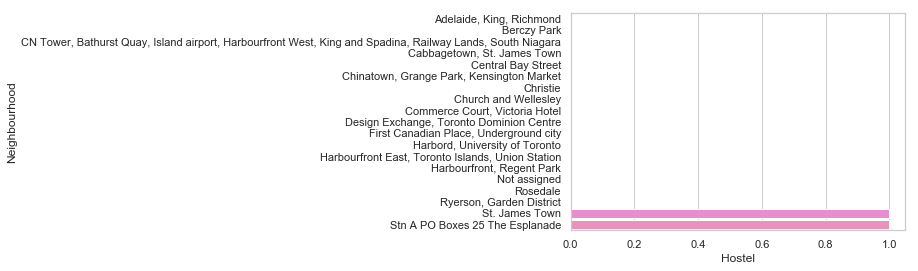

In [1003]:
import seaborn as sns
sns.set(style='whitegrid')
ax=sns.barplot(y="Neighbourhood", x="Hostel", data=toronto_groupedhotel)

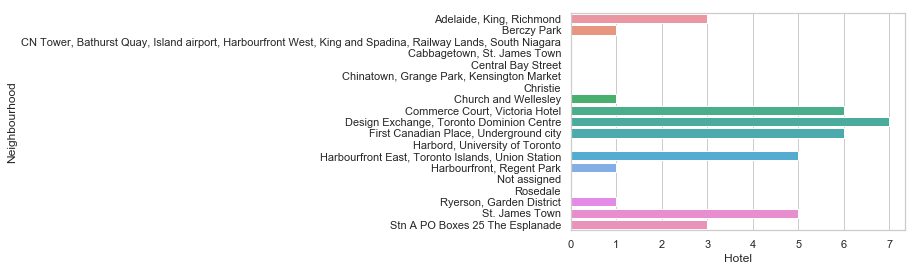

In [1004]:
import seaborn as sns
sns.set(style='whitegrid')
ax=sns.barplot(y="Neighbourhood", x="Hotel", data=toronto_groupedhotel)

In [1000]:
toronto_groupedhotel.head()

,Neighbourhood,Airport,Aquarium,Art Gallery,Art Museum,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Brewery,Café,Concert Hall,Convenience Store,Event Space,Farmers Market,Fish Market,Food Court,General Entertainment,General Travel,Grocery Store,Harbor / Marina,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Lake,Liquor Store,Market,Monument / Landmark,Museum,Music Venue,Neighborhood,Nightclub,Opera House,Other Great Outdoors,Park,Performing Arts Venue,Pharmacy,Pub,Restaurant,Scenic Lookout,Sculpture Garden,Supermarket,Theater,Theme Restaurant,Trail,Train Station
0,"Adelaide, King, Richmond",0,0,1,1,0,4,0,0,0,0,4,2,0,0,0,0,1,0,1,0,0,0,0,0,3,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,3,0,0,0,1,0,0,0
1,Berczy Park,0,0,1,0,0,0,0,1,1,0,2,1,0,0,2,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,2,2,0,0,0,0,0,0,0
2,"CN Tower, Bathurst Quay, Island airport, Harbo...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,"Cabbagetown, St. James Town",0,0,0,0,1,0,0,0,0,0,2,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,2,0,1,2,3,0,0,0,0,0,0,0
4,Central Bay Street,0,0,0,1,0,3,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


#### Let's print each neighborhood along with the top 5 most common venues

In [978]:
num_top_venues = 10

for hood in toronto_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
                 venue  freq
0                  Bar  0.04
1                 Café  0.04
2                Hotel  0.03
3           Restaurant  0.03
4         Concert Hall  0.02
5  Monument / Landmark  0.01
6       General Travel  0.01
7              Theater  0.01
8         Neighborhood  0.01
9          Art Gallery  0.01


----Berczy Park----
            venue  freq
0  Farmers Market  0.04
1            Café  0.04
2             Pub  0.04
3      Restaurant  0.04
4          Museum  0.02
5       Nightclub  0.02
6            Park  0.02
7     Fish Market  0.02
8    Concert Hall  0.02
9           Hotel  0.02


----CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara----
                  venue  freq
0               Airport  0.07
1       Harbor / Marina  0.07
2      Sculpture Garden  0.07
3  Other Great Outdoors  0.00
4          Liquor Store  0.00
5                Market  0.00
6   Monument / Landmark  0.00
7    

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [979]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [980]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Bar,Café,Restaurant,Hotel,Concert Hall,Art Museum,Art Gallery,Monument / Landmark,Theater,Food Court
1,Berczy Park,Farmers Market,Café,Restaurant,Pub,Basketball Stadium,Concert Hall,Nightclub,Liquor Store,Beach,Park
2,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport,Harbor / Marina,Sculpture Garden,Concert Hall,Grocery Store,General Travel,General Entertainment,Food Court,Fish Market,Farmers Market
3,"Cabbagetown, St. James Town",Restaurant,Pub,Park,Café,Convenience Store,General Entertainment,Bank,Pharmacy,Farmers Market,Liquor Store
4,Central Bay Street,Bar,Café,Art Museum,Park,Convenience Store,Harbor / Marina,Grocery Store,General Travel,General Entertainment,Food Court


## Cluster Neighborhoods

In [981]:
# set number of clusters
kclusters = 5
n_init=20

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 4, 1, 1, 0, 3, 1, 0, 0])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [982]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_final

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')


# check the last columns!
toronto_merged.dropna(subset=['Cluster Labels'], inplace=True)
toronto_merged['Cluster Labels']=toronto_merged['Cluster Labels'].astype('int32')
toronto_merged.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
50,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,2,Park,Trail,Concert Hall,Historic Site,Harbor / Marina,Grocery Store,General Travel,General Entertainment,Food Court,Fish Market
51,M4X,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675,1,Restaurant,Pub,Park,Café,Convenience Store,General Entertainment,Bank,Pharmacy,Farmers Market,Liquor Store
52,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,1,Restaurant,Pub,Café,Grocery Store,Park,Hotel,Nightclub,Sculpture Garden,General Entertainment,Theater
53,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,1,Pub,Park,Café,Theater,Hotel,Bank,Restaurant,Performing Arts Venue,Farmers Market,Event Space
54,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,1,Café,Bar,Theater,Restaurant,Hotel,Music Venue,Lake,Other Great Outdoors,Concert Hall,Pub


In [983]:
toronto_merged.shape

(19, 16)

Finally, let's visualize the resulting clusters

In [984]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

--------------------------

## Clusters

In [985]:
cluster1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0]
cluster1= pd.merge(cluster1,toronto_grouped[['Neighbourhood','Hostel','Hotel']],how='left',on='Neighbourhood')
cluster1.sort_values(['Hostel','Hotel'],ascending=False)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Hostel,Hotel
0,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Restaurant,Hotel,Café,Farmers Market,Park,Hostel,Performing Arts Venue,Concert Hall,Grocery Store,Theater,0.01,0.05
3,M5K,Downtown Toronto,"Design Exchange, Toronto Dominion Centre",43.647177,-79.381576,0,Café,Hotel,Restaurant,Bar,Hotel Bar,Concert Hall,Food Court,Basketball Stadium,Train Station,Pub,0.00,0.07
4,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel",43.648198,-79.379817,0,Café,Hotel,Restaurant,Bar,General Travel,Hotel Bar,Concert Hall,Park,Pub,Museum,0.00,0.06
7,M5X,Downtown Toronto,"First Canadian Place, Underground city",43.648429,-79.382280,0,Café,Hotel,Restaurant,Bar,Concert Hall,Train Station,Opera House,Food Court,Hotel Bar,Monument / Landmark,0.00,0.06
2,M5J,Downtown Toronto,"Harbourfront East, Toronto Islands, Union Station",43.640816,-79.381752,0,Hotel,Aquarium,Café,Brewery,Scenic Lookout,Park,Baseball Stadium,Bar,Music Venue,Restaurant,0.00,0.05
1,M5H,Downtown Toronto,"Adelaide, King, Richmond",43.650571,-79.384568,0,Bar,Café,Restaurant,Hotel,Concert Hall,Art Museum,Art Gallery,Monument / Landmark,Theater,Food Court,0.00,0.03
5,M5S,Downtown Toronto,"Harbord, University of Toronto",43.662696,-79.400049,0,Café,Restaurant,Bar,Theater,Pub,Nightclub,Train Station,Concert Hall,Grocery Store,General Travel,0.00,0.00
6,M5T,Downtown Toronto,"Chinatown, Grange Park, Kensington Market",43.653206,-79.400049,0,Café,Bar,Farmers Market,Grocery Store,Hotel Bar,Liquor Store,Food Court,Pharmacy,Fish Market,Park,0.00,0.00


Now let`s check our Cluster, the main idea here is to get our top ten most common venue in the neighboorhoods of Toronto, and we added to the cluster data frame the cuantity of hostels and hotel in each neigborhood.

Whit this information we can get some  insights for posible places to open a Hostel, for example in Cluster 1, we dont have any hostel in the neighoboorhoods but we have several hostels, why not to open a hostel in the neighboorhoods that have a hotel? Aforablle accomodetion for every one :).

In [986]:
cluster2 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1]
cluster2= pd.merge(cluster2,toronto_grouped[['Neighbourhood','Hostel','Hotel']],how='left',on='Neighbourhood')
cluster2.sort_values(['Hostel','Hotel'],ascending=False)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Hostel,Hotel
6,M5W,Downtown Toronto,Stn A PO Boxes 25 The Esplanade,43.646435,-79.374846,1,Café,Restaurant,Pub,Hotel,Art Gallery,Farmers Market,Park,Basketball Stadium,Concert Hall,Liquor Store,0.010417,0.031250
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,1,Pub,Park,Café,Theater,Hotel,Bank,Restaurant,Performing Arts Venue,Farmers Market,Event Space,0.000000,0.021277
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,1,Farmers Market,Café,Restaurant,Pub,Basketball Stadium,Concert Hall,Nightclub,Liquor Store,Beach,Park,0.000000,0.017544
1,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,1,Restaurant,Pub,Café,Grocery Store,Park,Hotel,Nightclub,Sculpture Garden,General Entertainment,Theater,0.000000,0.011364
3,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,1,Café,Bar,Theater,Restaurant,Hotel,Music Venue,Lake,Other Great Outdoors,Concert Hall,Pub,0.000000,0.010000
0,M4X,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675,1,Restaurant,Pub,Park,Café,Convenience Store,General Entertainment,Bank,Pharmacy,Farmers Market,Liquor Store,0.000000,0.000000
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,1,Bar,Café,Art Museum,Park,Convenience Store,Harbor / Marina,Grocery Store,General Travel,General Entertainment,Food Court,0.000000,0.000000
7,M7A,Queen's Park,Not assigned,43.662301,-79.389494,1,Theater,General Entertainment,Bar,Park,Café,Nightclub,Train Station,Concert Hall,Grocery Store,General Travel,0.000000,0.000000


In [987]:
cluster3 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 2]
cluster3= pd.merge(cluster3,toronto_grouped[['Neighbourhood','Hostel','Hotel']],how='left',on='Neighbourhood')
cluster3.sort_values(['Hostel','Hotel'],ascending=False)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Hostel,Hotel
0,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,2,Park,Trail,Concert Hall,Historic Site,Harbor / Marina,Grocery Store,General Travel,General Entertainment,Food Court,Fish Market,0.0,0.0


In [988]:
cluster4=toronto_merged.loc[toronto_merged['Cluster Labels'] == 3]
cluster4= pd.merge(cluster4,toronto_grouped[['Neighbourhood','Hostel','Hotel']],how='left',on='Neighbourhood')
cluster4.sort_values(['Hostel','Hotel'],ascending=False)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Hostel,Hotel
0,M6G,Downtown Toronto,Christie,43.669542,-79.422564,3,Grocery Store,Café,Park,Nightclub,Restaurant,Convenience Store,Train Station,General Travel,General Entertainment,Food Court,0.0,0.0


In [989]:
cluster5=toronto_merged.loc[toronto_merged['Cluster Labels'] == 4]
cluster5= pd.merge(cluster5,toronto_grouped[['Neighbourhood','Hostel','Hotel']],how='left',on='Neighbourhood')
cluster5.sort_values(['Hostel','Hotel'],ascending=False)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Hostel,Hotel
0,M5V,Downtown Toronto,"CN Tower, Bathurst Quay, Island airport, Harbo...",43.628947,-79.39442,4,Airport,Harbor / Marina,Sculpture Garden,Concert Hall,Grocery Store,General Travel,General Entertainment,Food Court,Fish Market,Farmers Market,0.0,0.0


---------------------------------------

In [526]:
g

NameError: name 'g' is not defined